<a href="https://colab.research.google.com/github/Aniket-rohara/Spam-msg-detection/blob/main/Spam_msg_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam message classification using Random Forest and Naive Bayes
## 1) Using Random Forest

### importing necessary modules

In [14]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### data collection

In [2]:
sms_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spamSMS.csv')

### Exploratory data analysis

In [3]:
sms_df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [4]:
sms_df.label.value_counts()

label
0    4827
1     747
Name: count, dtype: int64

In [5]:
sms_df['sms'][5572]

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n"

### Data processing

In [7]:
nlp = spacy.load('en_core_web_sm')

#### we are using spacy library as it is more efficient than nltk

In [ ]:
# # Stemming

# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# def stemming(text):
#     stem = [stemmer.stem(token) for token in doc]
#     return ' '.join(stem)

#### We can go for the above code snippet if we are using nltk library else we can go for the below one as SpaCy doesn't contain any function for stemming as it relies on lemmatization only.

#### The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

#### However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

#### Lemmatization and stemming are special cases of normalization. They identify a canonical representative for a set of related word forms.

In [8]:
# LEMMATIZATION

def lemmatization(text):
  doc = nlp(text)
  lemma = [token.lemma_ for token in doc]
  return ' '.join(lemma)

sms_df['lemma'] = sms_df['sms'].apply(lemmatization)

In [9]:
sms_df

,sms,label,lemma
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl..."
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou..."
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe..."
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...


In [10]:
sms_df['lemma'][5572]

'the guy do some bitching but I act like I would be interested in buy something else next week and he give it to we for free \n'

In [11]:
# REMOVE THE STOPWORDS

def remove_stopwords(text):
  doc = nlp(text)
  no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return ' '.join(no_stop_words)

sms_df['preprocessed'] = sms_df['lemma'].apply(remove_stopwords)

In [12]:
sms_df

,sms,label,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n,ok lar joke wif u oni \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c \n
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou...",nah think usf live \n
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...,2nd time try 2 contact u. U win £ 750 Pound pr...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n,ü b esplanade fr home \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe...",pity mood suggestion \n
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...,guy bitching act like interested buy week free \n


In [13]:
sms_df['preprocessed'][5572]

'guy bitching act like interested buy week free \n'

### Vectorization

In [15]:
v = CountVectorizer()

In [16]:
v.fit(sms_df['preprocessed'])

CountVectorizer()

In [17]:
bow = v.transform(sms_df['preprocessed'])

In [18]:
bow

<5574x7610 sparse matrix of type '<class 'numpy.int64'>'
	with 40954 stored elements in Compressed Sparse Row format>

In [19]:
print(bow)

  (0, 1038)	1
  (0, 1236)	1
  (0, 1629)	1
  (0, 1631)	1
  (0, 1888)	1
  (0, 2120)	1
  (0, 3260)	1
  (0, 3898)	1
  (0, 4007)	1
  (0, 5276)	1
  (0, 7280)	1
  (0, 7459)	1
  (1, 3863)	1
  (1, 4040)	1
  (1, 4915)	1
  (1, 4940)	1
  (1, 7377)	1
  (2, 77)	1
  (2, 404)	1
  (2, 413)	1
  (2, 785)	1
  (2, 1113)	1
  (2, 1990)	1
  (2, 2174)	1
  (2, 2663)	2
  :	:
  (5569, 4490)	1
  (5569, 4692)	1
  (5569, 4838)	1
  (5569, 5332)	1
  (5569, 5416)	1
  (5569, 5560)	1
  (5569, 6795)	1
  (5569, 6948)	1
  (5569, 7389)	1
  (5570, 2694)	1
  (5570, 2989)	1
  (5570, 3489)	1
  (5571, 4569)	1
  (5571, 5215)	1
  (5571, 6490)	1
  (5572, 895)	1
  (5572, 1447)	1
  (5572, 1660)	1
  (5572, 3000)	1
  (5572, 3306)	1
  (5572, 3724)	1
  (5572, 4124)	1
  (5572, 7318)	1
  (5573, 5767)	1
  (5573, 6941)	1


### Generate Training Testing Set

In [20]:
input = bow
target = sms_df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 42)

In [22]:
X_train.shape, X_test.shape

((4459, 7610), (1115, 7610))

### Model Training & Hyperparameter Tuning

In [23]:
model = RandomForestClassifier(n_jobs=1,
                               random_state = 42,
                               max_features = 15,
                               bootstrap = False,
                               class_weight = {0:1, 1:2})

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 2},
                       max_features=15, n_jobs=1, random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
m0 = model.estimators_[0]
m50 = model.estimators_[50]

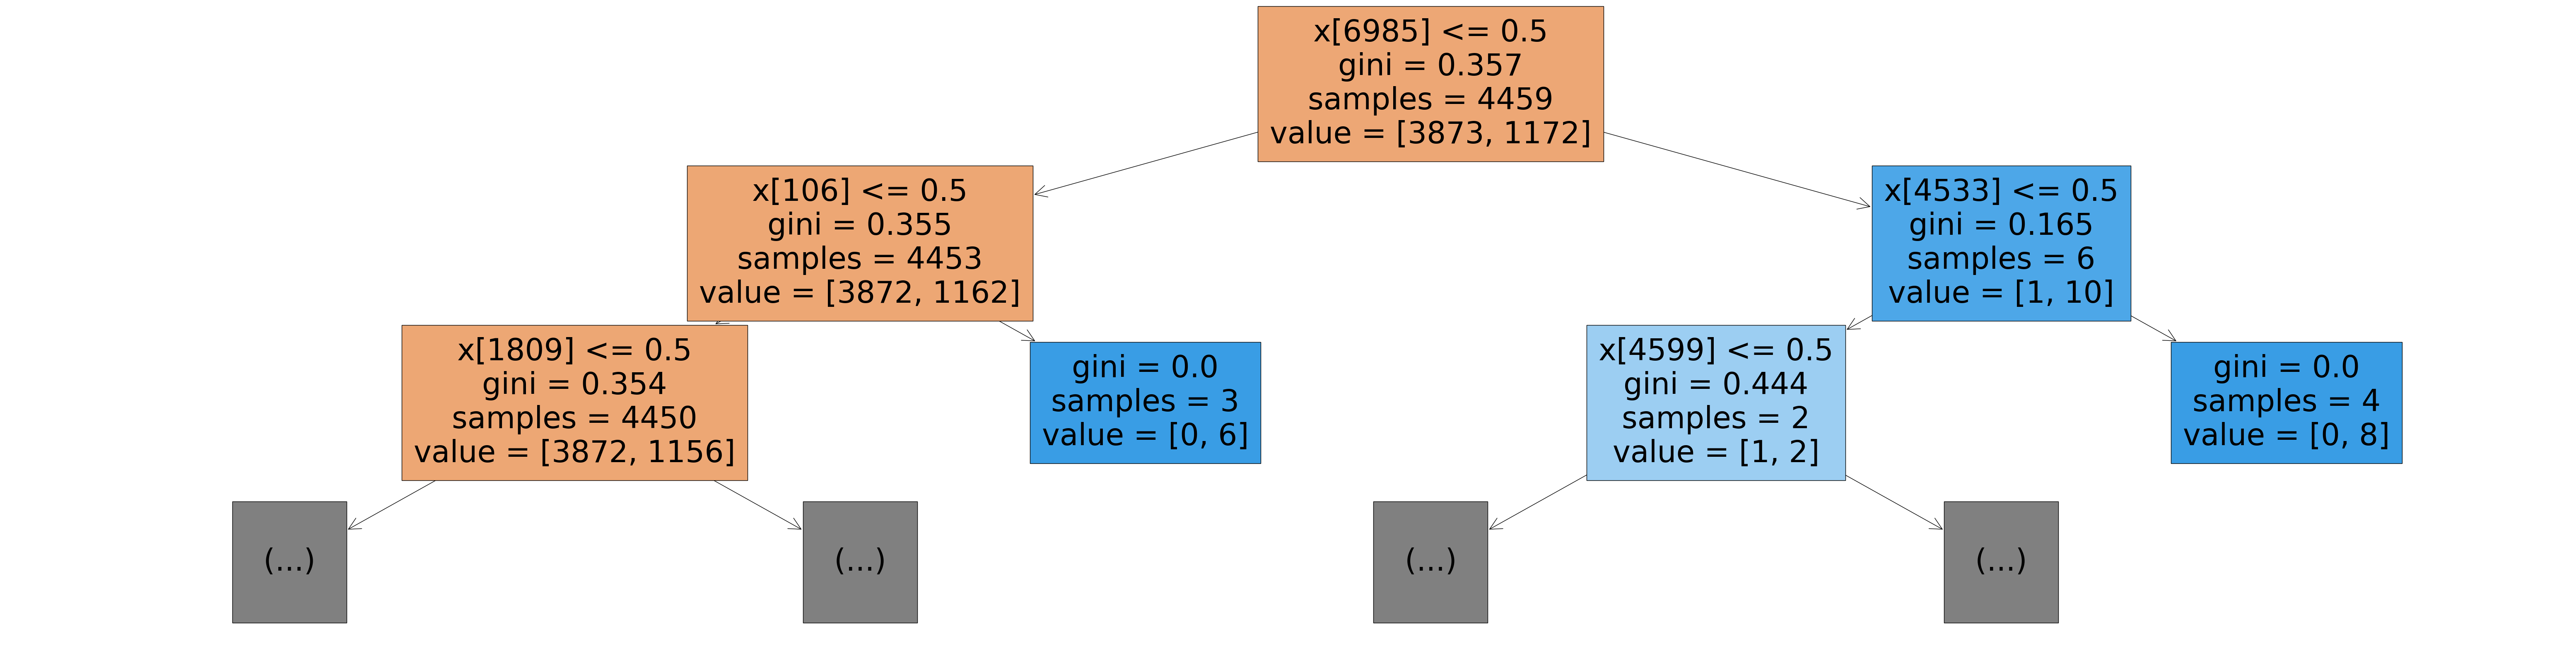

In [28]:
# VISUALIZING 0th TREE
plt.figure(figsize=(80,20))
plot_tree(m0, max_depth = 2, filled = True);

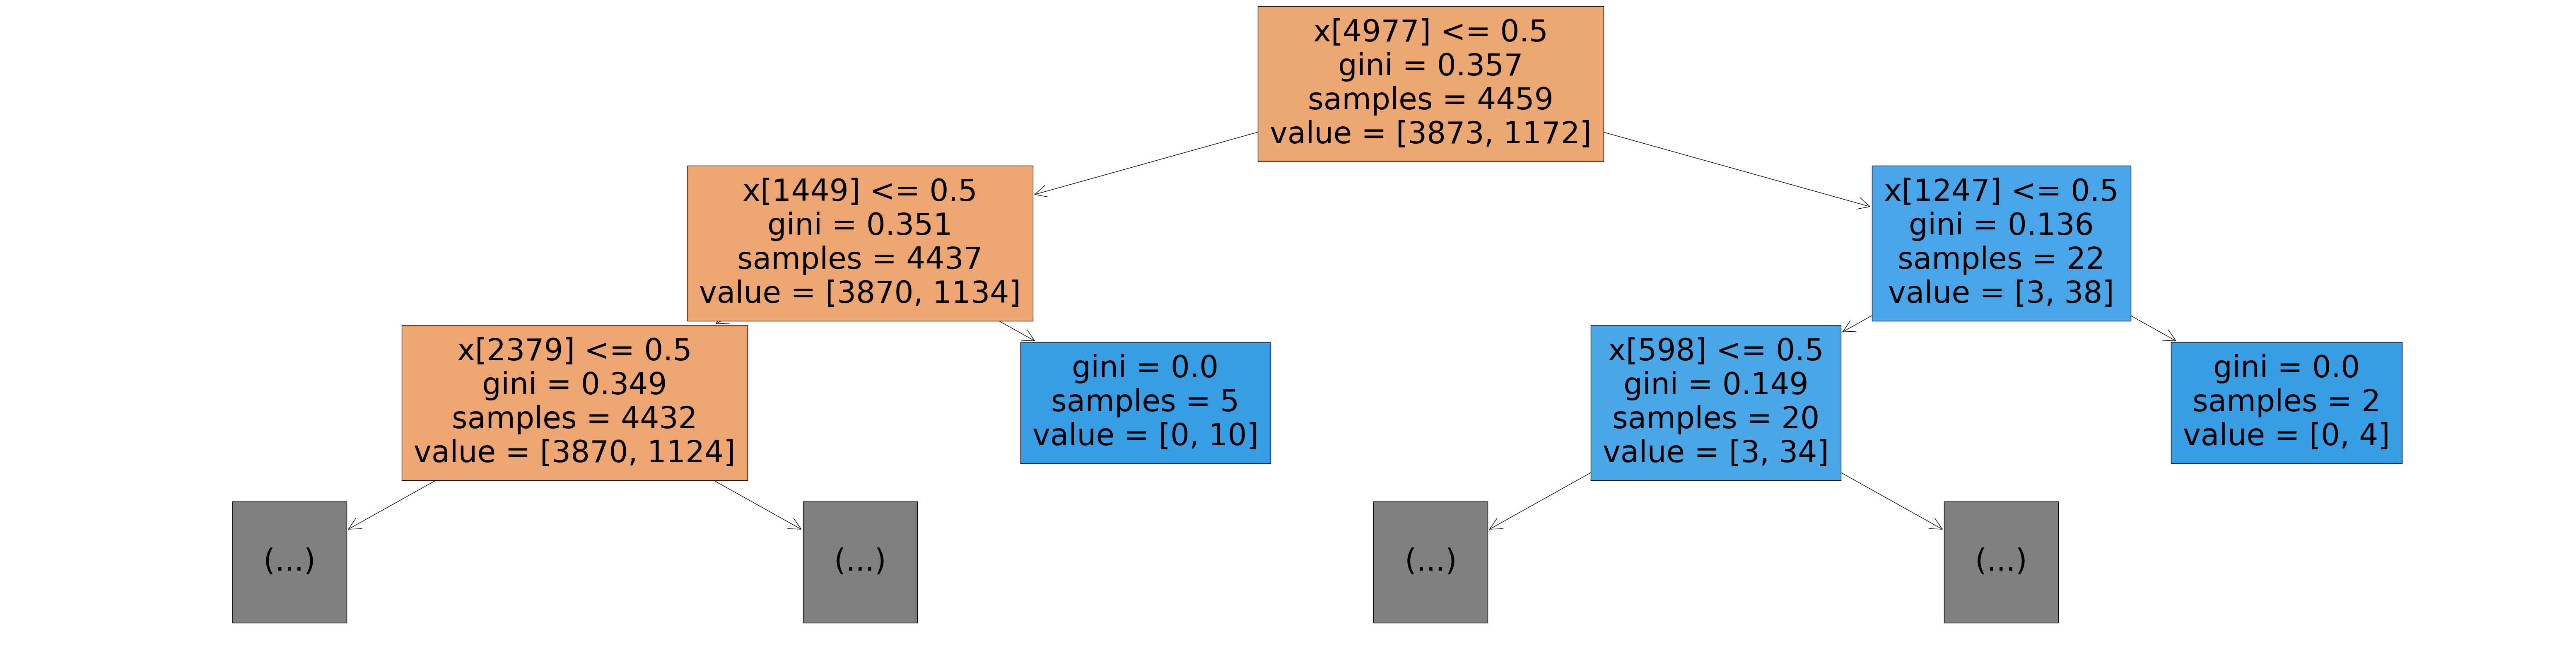

In [29]:
# VISUALIZING 50th TREE
plt.figure(figsize=(80,20))
plot_tree(m50, max_depth = 2, filled = True);

### Model performance evaluation

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
print(f'Model Accuracy : {accuracy_score(y_test, y_pred) * 100} %')

Model Accuracy : 97.39910313901345 %


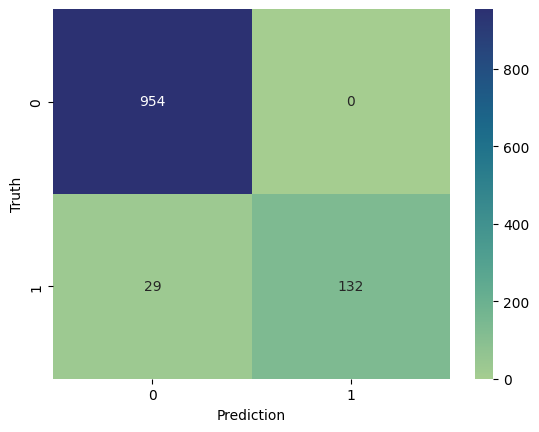

In [32]:
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot = True, fmt = 'd',  cmap="crest");
plt.xlabel('Prediction');
plt.ylabel('Truth');

## 2) Using Naives Bayes


In [33]:
sms_df

,sms,label,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n,ok lar joke wif u oni \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c \n
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou...",nah think usf live \n
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...,2nd time try 2 contact u. U win £ 750 Pound pr...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n,ü b esplanade fr home \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe...",pity mood suggestion \n
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...,guy bitching act like interested buy week free \n


In [34]:
sms_df['preprocessed'][5572]

'guy bitching act like interested buy week free \n'

In [35]:
input = sms_df['preprocessed']
target = sms_df['label']

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 42)

In [36]:
X_train.shape, y_train.shape

((4459,), (4459,))

In [37]:
X_test.shape, y_test.shape

((1115,), (1115,))

### Vectorization & Model Training

In [38]:
classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('Multi NB', MultinomialNB())])

In [39]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [40]:
y_test

3690    0
3527    0
724     0
3370    0
468     0
       ..
2942    0
4864    1
3227    0
3796    0
2879    1
Name: label, Length: 1115, dtype: int64

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Model performance evaluation

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.97      0.93      0.95       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [43]:
print(f'Model Accuracy : {accuracy_score(y_test, y_pred) * 100} %')

Model Accuracy : 98.56502242152466 %


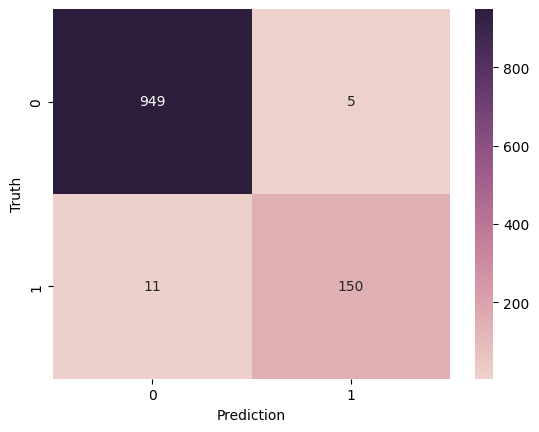

In [44]:
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot = True, fmt = 'd', cmap=sns.cubehelix_palette(as_cmap=True));
plt.xlabel('Prediction');
plt.ylabel('Truth');